# KMeans Clustering

In [1]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
import re
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from pylab import *
import nltk
import warnings
import seaborn as sns
sns.set()
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

warnings.filterwarnings('ignore')

In [3]:
# Descargando las stopwords y el wordnet
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\JManuel\anaconda
[nltk_data]     3\envs\ITESO_Anaconda\lib\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\JManuel\anaconda3\
[nltk_data]     envs\ITESO_Anaconda\lib\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# Utilizamos el diccionario de stopwords de inglés
stop_words = stopwords.words('english')

# Añadimos las carácteres imprimibles de forma que se eliminen junto con los stopwords
stop_words = stop_words + list(string.printable)

In [4]:
# Construimos nuestro lematizador
lemmatizer = WordNetLemmatizer()

In [6]:
# Cargamos los textos del dataset
categories = ['misc.forsale', 'sci.electronics', 'talk.religion.misc']

news_data = fetch_20newsgroups(subset='train',
                               categories=categories,
                               shuffle=True,
                               random_state=42,
                               download_if_missing=True)

In [7]:
# Convertimos los datos en un DataFrame para facilitar la manipulación

news_data_df = pd.DataFrame({'text': news_data['data'], 'category':news_data.target})
news_data_df.head()

,text,category
0,From: Steve@Busop.cit.wayne.edu (Steve Teolis)...,0
1,From: jks2x@holmes.acc.Virginia.EDU (Jason K. ...,0
2,From: wayne@uva386.schools.virginia.edu (Tony ...,1
3,From: lihan@ccwf.cc.utexas.edu (Bruce G. Bostw...,1
4,From: myoakam@cis.ohio-state.edu (micah r yoak...,0


In [8]:
# Limpiamos los datos, nuevamente podemos usar cualquiera de los dos métodos (Lambdas o Ciclos anidados)

news_data_df['cleaned_text'] = news_data_df['text'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word.lower())
                       for word in word_tokenize(re.sub(r'([^\s\w|]_)+', ' ', str(x)))
                       if word.lower() not in stop_words]))

news_data_df.head()

,text,category,cleaned_text
0,From: Steve@Busop.cit.wayne.edu (Steve Teolis)...,0,steve busop.cit.wayne.edu steve teolis subject...
1,From: jks2x@holmes.acc.Virginia.EDU (Jason K. ...,0,jks2x holmes.acc.virginia.edu jason k. schechn...
2,From: wayne@uva386.schools.virginia.edu (Tony ...,1,wayne uva386.schools.virginia.edu tony wayne s...
3,From: lihan@ccwf.cc.utexas.edu (Bruce G. Bostw...,1,lihan ccwf.cc.utexas.edu bruce g. bostwick sub...
4,From: myoakam@cis.ohio-state.edu (micah r yoak...,0,myoakam cis.ohio-state.edu micah yoakam subjec...


In [12]:
# Transformamos el texto para representarlo en un vector TDIDF
# nuevamente usamos la función 'to_dense()' para tener un arreglo y no un sparse matrix.

tfidf_model = TfidfVectorizer(max_features=200)
tfidf_df = pd.DataFrame(tfidf_model.fit_transform(news_data_df['cleaned_text']).todense())
tfidf_df.columns = sorted(tfidf_model.vocabulary_)
tfidf_df.head()

,00,10,100,12,14,15,16,20,25,30,...,well,wire,wiring,without,word,work,world,would,writes,year
0,0.435553,0.0,0.000000,0.0,0.000000,0.127745,0.136779,0.127521,0.13328,0.0,...,0.0,0.0,0.0,0.0,0.0,0.113172,0.000000,0.000000,0.000000,0.0
1,0.000000,0.0,0.000000,0.0,0.000000,0.249879,0.000000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
3,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.140439,0.102891,0.099018,0.0
4,0.000000,0.0,0.215013,0.0,0.199323,0.189186,0.000000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0


In [13]:
# Generamos nuestros clusters. Inicialmente, estamos buscando 4 clusters.
# Añadimos una columna a nuestro DataFrame con el cluster al que pertenece cada texto

kmeans = KMeans(n_clusters=4)
kmeans.fit(tfidf_df)
y_kmeans = kmeans.predict(tfidf_df)
news_data_df['cluster'] = y_kmeans

In [15]:
# Validamos contra las categorías
pd.crosstab(news_data_df['category'].replace({0:'misc.for.sale', 1:'sci.electronics', 2:'talk.religion.misc'}),
            news_data_df['cluster'].replace({1:'cluster_1', 2:'cluster_2', 3:'cluster_3', 4:'cluster_4'}))

cluster,0,cluster_1,cluster_2,cluster_3
category,,,,
misc.for.sale,95,360,2,128
sci.electronics,444,9,0,138
talk.religion.misc,75,0,229,73


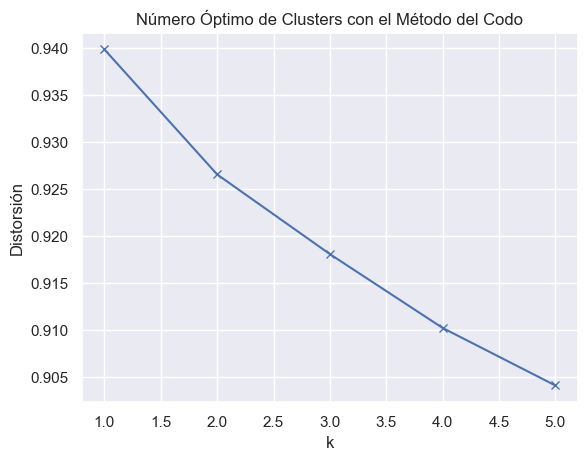

In [16]:
distortions = []
K = range(1,6)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(tfidf_df)
    distortions.append(sum(np.min(cdist(tfidf_df, kmeanModel.cluster_centers_, 'euclidean'),
                                  axis=1)) / tfidf_df.shape[0])

# Graficamos el codo
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distorsión')
plt.title('Número Óptimo de Clusters con el Método del Codo')
plt.show()
# El óptimo es donde la pendiente es la más empinada (en este caso 2)